In [16]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

In [185]:
df = pd.read_csv("titanic.csv")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: xlabel='Pclass'>

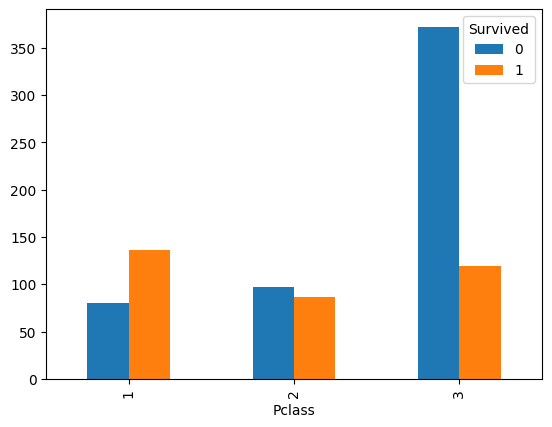

In [186]:
a  = pd.crosstab(df.Pclass,df.Survived)  
# pandas.crosstab basically cross tabulates(in terms of row and column) any two columns from dataframe and tabulates on basis of frequency unless aggregate function is mentioned.
a.plot(kind="bar")

<Axes: xlabel='Sex'>

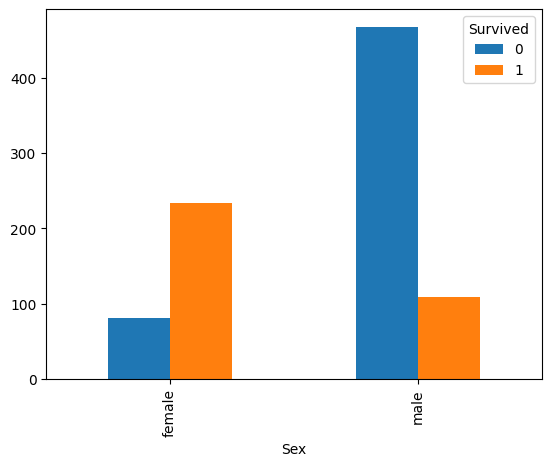

In [187]:
a = pd.crosstab(df.Sex,df.Survived)
a.plot(kind="bar")

Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64


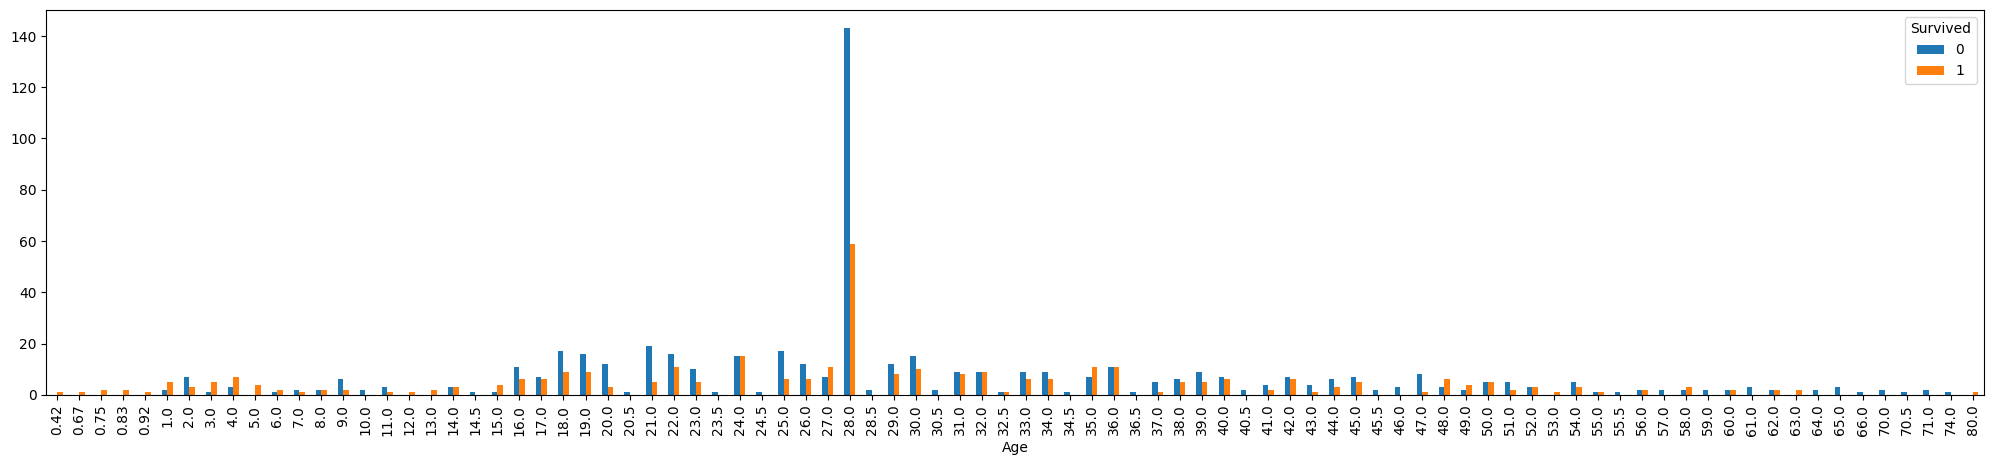

In [188]:
df["Age"] = df['Age'].fillna(df['Age'].median())
a = pd.crosstab(df.Age,df.Survived)
# # b = df.loc[df["Survived"]==1,"Age"]
# # c = df[df["Survived"]==1]
# # plt.bar(b,c.Survived)
a.plot(kind="bar",figsize=(25,5))
print(df.groupby(["Survived"])["Age"].mean())


Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


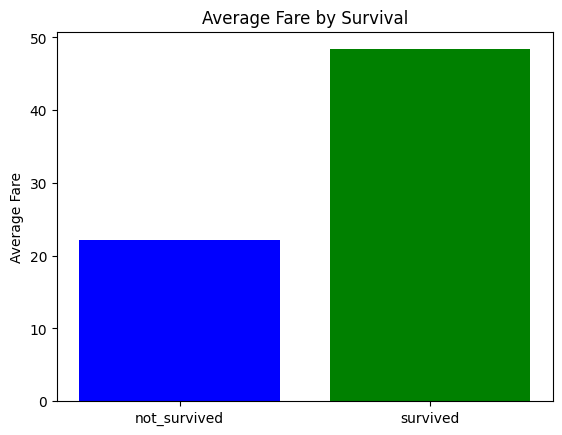

In [189]:
mean = df.groupby(df.Survived)["Fare"].mean()
survived = df[df["Survived"]==1]["Fare"].dropna()
not_survived = df[df["Survived"]==0]["Fare"].dropna()
plt.ylabel('Average Fare')
plt.title('Average Fare by Survival')
plt.bar(["not_survived","survived"],mean,color=["blue","green"])
print(mean)

The groupby() function in Pandas involves three main steps: Splitting, Applying, and Combining.

Splitting: This step involves dividing the DataFrame into groups based on some criteria. The groups are defined by unique values in one or more columns.
Applying: In this step, a function is applied to each group independently. You can apply various functions to each group, such as:
Aggregation: Calculate summary statistics (e.g., sum, mean, count) for each group.
Transformation: Modify the values within each group.
Filtering: Keep or discard groups based on certain conditions.
Combining: Finally, the results of the applied function are combined into a new DataFrame or Series.
The groupby method has several parameters that can be customized:

DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, observed=False, dropna=True)

<Axes: xlabel='Embarked'>

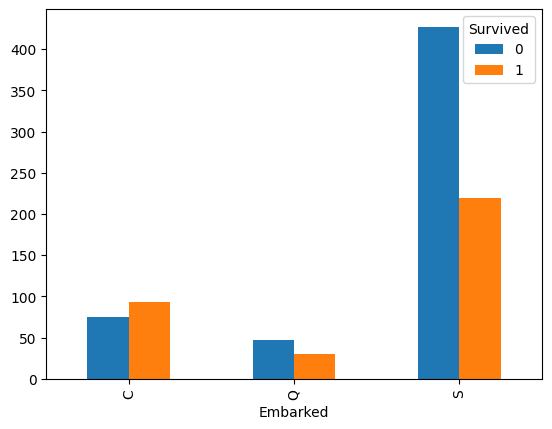

In [190]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])     #Filling the missing vlues with most frequent values, for many frequent values , we are choosing [0]
pd.crosstab(df["Embarked"],df.Survived).plot(kind="bar")

<Axes: xlabel='Family_Members'>

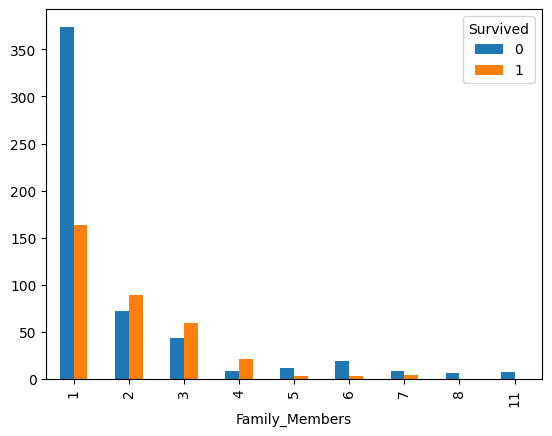

In [191]:
df["Family_Members"] = df["SibSp"] + df["Parch"] + 1 
"""The 1 is added to count the person too in the family member , SibSp indicates sibling/spouse and Parch is parent/children of that family member boarding the ship.
Total Family Members = Person("Name") + SbSp + Parch = SbSp + Parch + 1"""
d = df.drop(["SibSp","Parch"],axis="columns")
pd.crosstab(df["Family_Members"],df.Survived).plot(kind="bar")




In [192]:
target = df.Survived

dl = d[["Pclass","Sex","Age","Fare","Embarked","Family_Members"]]
dl

,Pclass,Sex,Age,Fare,Embarked,Family_Members
0,3,male,22.0,7.2500,S,2
1,1,female,38.0,71.2833,C,2
2,3,female,26.0,7.9250,S,1
3,1,female,35.0,53.1000,S,2
4,3,male,35.0,8.0500,S,1
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,S,1
887,1,female,19.0,30.0000,S,1
888,3,female,28.0,23.4500,S,4
889,1,male,26.0,30.0000,C,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
s = LabelEncoder()
dl["Sex"] = s.fit_transform(df.loc[:,"Sex"])
dl["Embarked"] = s.fit_transform(df.loc[:,"Embarked"])

C:\Users\user\AppData\Local\Temp\ipykernel_19632\2762701539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dl["Sex"] = s.fit_transform(df.loc[:,"Sex"])
C:\Users\user\AppData\Local\Temp\ipykernel_19632\2762701539.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dl["Embarked"] = s.fit_transform(df.loc[:,"Embarked"])


,Pclass,Sex,Age,Fare,Embarked,Family_Members
0,3,1,22.0,7.2500,2,2
1,1,0,38.0,71.2833,0,2
2,3,0,26.0,7.9250,2,1
3,1,0,35.0,53.1000,2,2
4,3,1,35.0,8.0500,2,1
...,...,...,...,...,...,...
886,2,1,27.0,13.0000,2,1
887,1,0,19.0,30.0000,2,1
888,3,0,28.0,23.4500,2,4
889,1,1,26.0,30.0000,0,1


In [293]:
trainX,testX,trainY,testY = train_test_split(dl.drop(["Embarked","Family_Members"],axis="columns"),target,train_size=0.8)
model = tree.DecisionTreeClassifier()
model.fit(trainX,trainY)
model.score(testX,testY)


0.8156424581005587

Text(0.5, 1.0, 'Confusion Matrix')

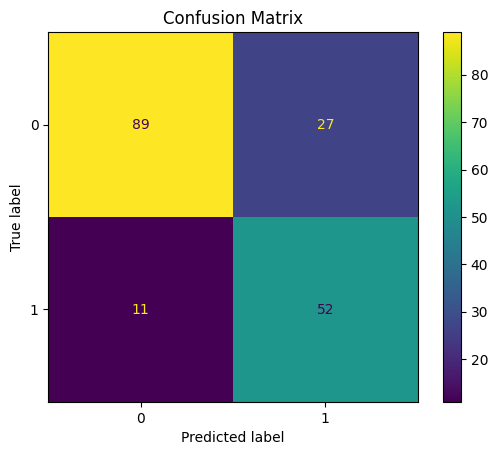

In [291]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm= confusion_matrix(testY,model.predict(testX))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Confusion Matrix")